## 1. Import necessary libraries

In [266]:
import pandas as pd
import numpy as np
from functools import reduce
import calendar  # For month name formatting

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#import preprocessing module
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import SelectFromModel



from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso

# machine learning
# from lightgbm import LGBMClassifier
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# importing library for classification types
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Load the datasets

In [267]:
cust = pd.read_csv("C:/Users/Bluechip/Desktop/Personal Projects/Customer Churn Prediction/customer_data.csv")

In [268]:
hist = pd.read_csv("C:/Users/Bluechip/Desktop/Personal Projects/Customer Churn Prediction/historical_price_data.csv")

In [269]:
churn = pd.read_csv("C:/Users/Bluechip/Desktop/Personal Projects/Customer Churn Prediction/churn_data.csv")

In [142]:
hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [143]:
churn.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


## a. Customer Data

In [144]:
cust.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [145]:
cust.shape

(16096, 32)

In [146]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [147]:
cust.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [148]:
cust.columns

Index(['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'cons_12m',
       'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_first_activ', 'date_modif_prod', 'date_renewal',
       'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max'],
      dtype='object')

In [270]:
cust.isnull().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

In [150]:
cust.duplicated().sum()

0

In [151]:
cust.shape

(16096, 32)

In [152]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

## 3. Datetime Coversion

In [271]:
cust[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']] = cust[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']].apply(pd.to_datetime)

In [154]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   activity_new              6551 non-null   object        
 2   campaign_disc_ele         0 non-null      float64       
 3   channel_sales             11878 non-null  object        
 4   cons_12m                  16096 non-null  int64         
 5   cons_gas_12m              16096 non-null  int64         
 6   cons_last_month           16096 non-null  int64         
 7   date_activ                16096 non-null  datetime64[ns]
 8   date_end                  16094 non-null  datetime64[ns]
 9   date_first_activ          3508 non-null   object        
 10  date_modif_prod           15939 non-null  datetime64[ns]
 11  date_renewal              16056 non-null  datetime64[ns]
 12  forecast_base_bill

## 4.Handling Missing Values

### a. Dropping irrelevant columns / columns with excess missing values

In [155]:
cust.isnull().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

In [157]:
cust.isnull().sum()

id                             0
channel_sales               4218
cons_12m                       0
cons_gas_12m                   0
cons_last_month                0
date_activ                     0
date_end                       2
date_modif_prod              157
date_renewal                  40
forecast_cons_12m              0
forecast_cons_year             0
forecast_discount_energy     126
forecast_meter_rent_12m        0
forecast_price_energy_p1     126
forecast_price_energy_p2     126
forecast_price_pow_p1        126
has_gas                        0
imp_cons                       0
nb_prod_act                    0
num_years_antig                0
origin_up                     87
pow_max                        3
dtype: int64

In [277]:
cust['activity_new'].fillna('Unknown', inplace = True)

In [278]:
cust['activity_new'].head(10)

0    esoiiifxdlbkcsluxmfuacbdckommixw
1                             Unknown
2                             Unknown
3                             Unknown
4                             Unknown
5    sfisfxfcocfpcmckuekokxuseixdaoeu
6                             Unknown
7                             Unknown
8    sscfoipxikopfskekuobeuxkxmwsuucb
9                             Unknown
Name: activity_new, dtype: object

In [279]:
cust.isnull().sum()

id                              0
activity_new                    0
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

In [288]:
cust.drop(columns = ['campaign_disc_ele', 'date_first_activ', 'forecast_base_bill_ele','forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'margin_gross_pow_ele'], inplace = True)

In [292]:
cust['channel_sales'].nunique()

7

In [293]:
cust['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    7377
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [294]:
# Create a mapping dictionary with the new names
channel_mapping = {
    'foosdfpfkusacimwkcsosbicdxkicaua': 'Direct Sales',
    'lmkebamcaaclubfxadlmueccxoimlema': 'Online Sales',
    'usilxuppasemubllopkaafesmlibmsdf': 'Partner Sales',
    'ewpakwlliwisiwduibdlfmalxowmwpci': 'Retail Sales',
    'sddiedcslfslkckwlfkdpoeeailfpeds': 'Promo Sales',
    'epumfxlbckeskwekxbiuasklxalciiuu': 'Inbound Sales',
    'fixdbufsefwooaasfcxdxadsiekoceaa': 'Outbound Sales'
}

# Apply the mapping to the 'channel_sales' column
cust['channel_sales'] = cust['channel_sales'].replace(channel_mapping)

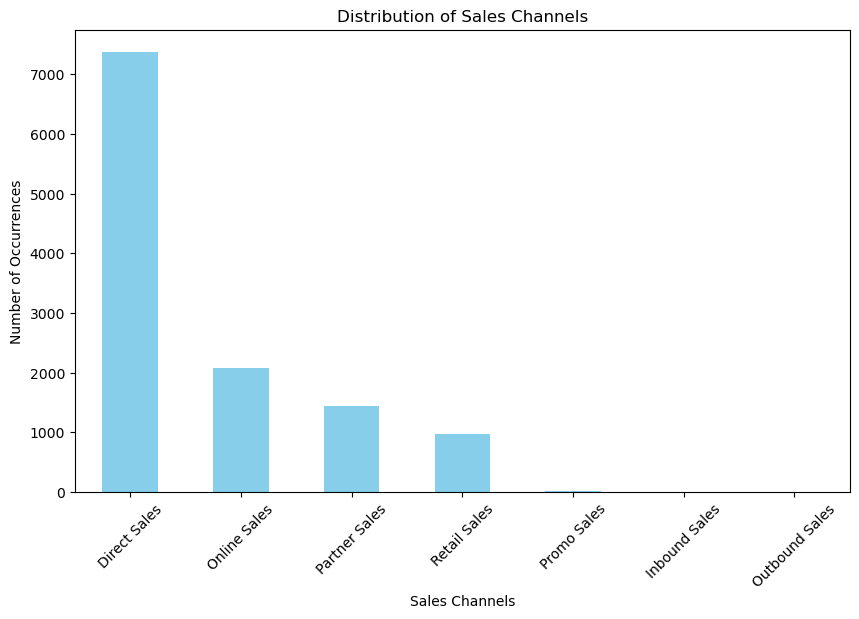

In [161]:
plt.figure(figsize=(10, 6))
cust['channel_sales'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sales Channels')
plt.xlabel('Sales Channels')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

In [295]:
cust['channel_sales'].value_counts()

channel_sales
Direct Sales      7377
Online Sales      2073
Partner Sales     1444
Retail Sales       966
Promo Sales         12
Inbound Sales        4
Outbound Sales       2
Name: count, dtype: int64

### b. Replace NaN values in 'channel_sales' with the Mode (Direct Sales)

In [296]:
cust['channel_sales'].fillna('Direct Sales', inplace=True)

In [297]:
cust['channel_sales'].value_counts()

channel_sales
Direct Sales      11595
Online Sales       2073
Partner Sales      1444
Retail Sales        966
Promo Sales          12
Inbound Sales         4
Outbound Sales        2
Name: count, dtype: int64

In [298]:
cust.isnull().sum()

id                            0
activity_new                  0
channel_sales                 0
cons_12m                      0
cons_gas_12m                  0
cons_last_month               0
date_activ                    0
date_end                      2
date_modif_prod             157
date_renewal                 40
forecast_cons_12m             0
forecast_cons_year            0
forecast_discount_energy    126
forecast_meter_rent_12m       0
forecast_price_energy_p1    126
forecast_price_energy_p2    126
forecast_price_pow_p1       126
has_gas                       0
imp_cons                      0
margin_net_pow_ele           13
nb_prod_act                   0
net_margin                   15
num_years_antig               0
origin_up                    87
pow_max                       3
dtype: int64

In [299]:
cust['date_end'].value_counts()

date_end
2016-02-01    152
2016-08-01    138
2016-09-01    122
2016-12-31    118
2016-10-05    116
             ... 
2017-06-01      1
2017-01-28      1
2017-06-13      1
2013-05-06      1
2017-06-11      1
Name: count, Length: 371, dtype: int64

In [300]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   activity_new              16096 non-null  object        
 2   channel_sales             16096 non-null  object        
 3   cons_12m                  16096 non-null  int64         
 4   cons_gas_12m              16096 non-null  int64         
 5   cons_last_month           16096 non-null  int64         
 6   date_activ                16096 non-null  datetime64[ns]
 7   date_end                  16094 non-null  datetime64[ns]
 8   date_modif_prod           15939 non-null  datetime64[ns]
 9   date_renewal              16056 non-null  datetime64[ns]
 10  forecast_cons_12m         16096 non-null  float64       
 11  forecast_cons_year        16096 non-null  int64         
 12  forecast_discount_

### c. Replace NaN values in 'date_end' with the Mode

In [301]:
cust['date_end'].fillna(cust['date_end'].mode()[0], inplace=True)

In [302]:
cust['date_end'].value_counts()

date_end
2016-02-01    154
2016-08-01    138
2016-09-01    122
2016-12-31    118
2016-10-05    116
             ... 
2017-06-01      1
2017-01-28      1
2017-06-13      1
2013-05-06      1
2017-06-11      1
Name: count, Length: 371, dtype: int64

In [303]:
cust.isnull().sum()

id                            0
activity_new                  0
channel_sales                 0
cons_12m                      0
cons_gas_12m                  0
cons_last_month               0
date_activ                    0
date_end                      0
date_modif_prod             157
date_renewal                 40
forecast_cons_12m             0
forecast_cons_year            0
forecast_discount_energy    126
forecast_meter_rent_12m       0
forecast_price_energy_p1    126
forecast_price_energy_p2    126
forecast_price_pow_p1       126
has_gas                       0
imp_cons                      0
margin_net_pow_ele           13
nb_prod_act                   0
net_margin                   15
num_years_antig               0
origin_up                    87
pow_max                       3
dtype: int64

In [304]:
cust['date_modif_prod'].value_counts()

date_modif_prod
2015-11-01    592
2015-05-24    275
2015-12-17    202
2015-12-16    181
2015-11-18    179
             ... 
2011-02-19      1
2005-07-22      1
2007-04-02      1
2005-11-29      1
2015-05-08      1
Name: count, Length: 2307, dtype: int64

### c. Drop the NaN values in 'date_modif_prod' 

In [315]:
cust = cust.dropna(subset=['date_modif_prod'])

In [316]:
cust.isnull().sum()

id                            0
activity_new                  0
channel_sales                 0
cons_12m                      0
cons_gas_12m                  0
cons_last_month               0
date_activ                    0
date_end                      0
date_modif_prod               0
date_renewal                 39
forecast_cons_12m             0
forecast_cons_year            0
forecast_discount_energy    125
forecast_meter_rent_12m       0
forecast_price_energy_p1    125
forecast_price_energy_p2    125
forecast_price_pow_p1       125
has_gas                       0
imp_cons                      0
margin_net_pow_ele           13
nb_prod_act                   0
net_margin                   15
num_years_antig               0
origin_up                    87
pow_max                       3
dtype: int64

### d. Remove NaN values in 'date_renewal' 

In [317]:
cust = cust.dropna(subset=['date_renewal'])

In [318]:
cust.isnull().sum()

id                            0
activity_new                  0
channel_sales                 0
cons_12m                      0
cons_gas_12m                  0
cons_last_month               0
date_activ                    0
date_end                      0
date_modif_prod               0
date_renewal                  0
forecast_cons_12m             0
forecast_cons_year            0
forecast_discount_energy    125
forecast_meter_rent_12m       0
forecast_price_energy_p1    125
forecast_price_energy_p2    125
forecast_price_pow_p1       125
has_gas                       0
imp_cons                      0
margin_net_pow_ele           13
nb_prod_act                   0
net_margin                   15
num_years_antig               0
origin_up                    87
pow_max                       3
dtype: int64

### e. Remove NaN values in 'forecast_discount_energy' 

In [319]:
cust = cust.dropna(subset=['forecast_discount_energy'])

In [320]:
cust.isnull().sum()

id                           0
activity_new                 0
channel_sales                0
cons_12m                     0
cons_gas_12m                 0
cons_last_month              0
date_activ                   0
date_end                     0
date_modif_prod              0
date_renewal                 0
forecast_cons_12m            0
forecast_cons_year           0
forecast_discount_energy     0
forecast_meter_rent_12m      0
forecast_price_energy_p1     0
forecast_price_energy_p2     0
forecast_price_pow_p1        0
has_gas                      0
imp_cons                     0
margin_net_pow_ele          12
nb_prod_act                  0
net_margin                  14
num_years_antig              0
origin_up                   87
pow_max                      3
dtype: int64

### f. Remove NaN values in 'forecast_price_energy_p1'

In [321]:
cust = cust.dropna(subset=['forecast_price_energy_p1'])

### g. Remove NaN values in 'forecast_price_energy_p2' 

In [322]:
cust = cust.dropna(subset=['forecast_price_energy_p2'])

### h. Remove NaN values in 'origin_up' 

In [323]:
cust = cust.dropna(subset=['origin_up'])

In [324]:
replacements = {
    'lxidpiddsbxsbosboudacockeimpuepw': 'Category A',
    'kamkkxfxxuwbdslkwifmmcsiusiuosws': 'Category B',
    'ldkssxwpmemidmecebumciepifcamkci': 'Category C',
    'usapbepcfoloekilkwsdiboslwaxobdp': 'Category D',
    'ewxeelcelemmiwuafmddpobolfuxioce': 'Category E'
}
cust['origin_up'].replace(replacements, inplace=True)

In [325]:
cust['origin_up'].value_counts()

origin_up
Category A    7593
Category B    4498
Category C    3594
Category D       2
Category E       1
Name: count, dtype: int64

### i. Remove NaN values in 'pow_max' 

In [327]:
cust = cust.dropna(subset=['pow_max'])

In [328]:
cust.isnull().sum()

id                           0
activity_new                 0
channel_sales                0
cons_12m                     0
cons_gas_12m                 0
cons_last_month              0
date_activ                   0
date_end                     0
date_modif_prod              0
date_renewal                 0
forecast_cons_12m            0
forecast_cons_year           0
forecast_discount_energy     0
forecast_meter_rent_12m      0
forecast_price_energy_p1     0
forecast_price_energy_p2     0
forecast_price_pow_p1        0
has_gas                      0
imp_cons                     0
margin_net_pow_ele           9
nb_prod_act                  0
net_margin                  11
num_years_antig              0
origin_up                    0
pow_max                      0
dtype: int64

### j. Remove NaN values in 'forecast_price_pow_p1' 

In [329]:
cust = cust.dropna(subset=['forecast_price_pow_p1'])

In [330]:
cust.isnull().sum()

id                           0
activity_new                 0
channel_sales                0
cons_12m                     0
cons_gas_12m                 0
cons_last_month              0
date_activ                   0
date_end                     0
date_modif_prod              0
date_renewal                 0
forecast_cons_12m            0
forecast_cons_year           0
forecast_discount_energy     0
forecast_meter_rent_12m      0
forecast_price_energy_p1     0
forecast_price_energy_p2     0
forecast_price_pow_p1        0
has_gas                      0
imp_cons                     0
margin_net_pow_ele           9
nb_prod_act                  0
net_margin                  11
num_years_antig              0
origin_up                    0
pow_max                      0
dtype: int64

### k. Remove NaN values in 'margin_net_pow_ele' 

In [331]:
cust = cust.dropna(subset=['margin_net_pow_ele'])

### k. Remove NaN values in 'net_margin' 

In [332]:
cust = cust.dropna(subset=['net_margin'])

In [333]:
cust.isnull().sum()

id                          0
activity_new                0
channel_sales               0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_modif_prod             0
date_renewal                0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
origin_up                   0
pow_max                     0
dtype: int64

In [334]:
cust.shape

(15674, 25)

In [197]:
# Now, our data is totally clean! 

In [335]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15674 entries, 0 to 16095
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        15674 non-null  object        
 1   activity_new              15674 non-null  object        
 2   channel_sales             15674 non-null  object        
 3   cons_12m                  15674 non-null  int64         
 4   cons_gas_12m              15674 non-null  int64         
 5   cons_last_month           15674 non-null  int64         
 6   date_activ                15674 non-null  datetime64[ns]
 7   date_end                  15674 non-null  datetime64[ns]
 8   date_modif_prod           15674 non-null  datetime64[ns]
 9   date_renewal              15674 non-null  datetime64[ns]
 10  forecast_cons_12m         15674 non-null  float64       
 11  forecast_cons_year        15674 non-null  int64         
 12  forecast_discount_energ

In [336]:
cust.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.567400e+04,1.567400e+04,1.567400e+04,15674,15674,15674,15674,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000
mean,1.915538e+05,3.132277e+04,1.929701e+04,2011-01-08 05:05:17.417379328,2016-07-28 01:39:57.396962816,2012-12-09 11:44:28.419037952,2015-07-21 02:51:14.952150016,2350.149525,1888.518311,0.976139,70.163502,0.135925,0.052858,43.522175,194.139225,21.372271,1.348092,217.349803,5.052188,20.438270
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,2000-07-25 00:00:00,2013-05-06 00:00:00,2000-07-25 00:00:00,2013-06-26 00:00:00,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,5.883500e+03,0.000000e+00,0.000000e+00,2010-01-11 00:00:00,2016-04-27 00:00:00,2010-08-04 00:00:00,2015-04-17 00:00:00,512.210000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.950000,1.000000,51.962500,4.000000,12.500000
50%,1.520100e+04,0.000000e+00,8.960000e+02,2011-02-21 00:00:00,2016-08-01 00:00:00,2013-04-22 00:00:00,2015-07-27 00:00:00,1176.060000,376.000000,0.000000,19.430000,0.142881,0.086163,44.311378,43.980000,20.800000,1.000000,119.385000,5.000000,13.856000
75%,4.948550e+04,0.000000e+00,4.096000e+03,2012-04-17 00:00:00,2016-11-01 00:00:00,2015-05-24 00:00:00,2015-10-30 00:00:00,2673.220000,1990.000000,0.000000,131.500000,0.146348,0.098837,44.311378,217.352500,29.585000,1.000000,274.130000,6.000000,19.800000
max,1.609711e+07,4.154590e+06,4.538720e+06,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,32.000000,24570.650000,16.000000,500.000000
std,6.724861e+05,1.716293e+05,8.229678e+04,NaN,NaN,NaN,NaN,3985.239567,5233.237167,5.124103,78.602849,0.026282,0.048638,5.221781,491.951025,27.938879,1.475092,364.414103,1.670284,21.164053


## 5. Feature Extraction

In [337]:
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

for col in date_columns:
    cust[col + '_year'] = cust[col].dt.year
    cust[col + '_month'] = cust[col].dt.month_name()
    cust[col + '_weekday'] = cust[col].dt.day_name()

In [338]:
cust.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,date_activ_weekday,date_end_year,date_end_month,date_end_weekday,date_modif_prod_year,date_modif_prod_month,date_modif_prod_weekday,date_renewal_year,date_renewal_month,date_renewal_weekday
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,Online Sales,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,Wednesday,2016,November,Sunday,2012,November,Wednesday,2015,November,Monday
2,d29c2c54acc38ff3c0614d0a653813dd,Unknown,Direct Sales,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,Friday,2016,August,Tuesday,2009,August,Friday,2015,August,Monday
3,764c75f661154dac3a6c254cd082ea7d,Unknown,Direct Sales,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,Friday,2016,April,Saturday,2010,April,Friday,2015,April,Friday
4,bba03439a292a1e166f80264c16191cb,Unknown,Online Sales,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,Tuesday,2016,March,Wednesday,2010,March,Tuesday,2015,March,Tuesday
5,568bb38a1afd7c0fc49c77b3789b59a3,sfisfxfcocfpcmckuekokxuseixdaoeu,Direct Sales,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,...,Thursday,2016,April,Friday,2010,April,Thursday,2015,April,Sunday


In [339]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15674 entries, 0 to 16095
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        15674 non-null  object        
 1   activity_new              15674 non-null  object        
 2   channel_sales             15674 non-null  object        
 3   cons_12m                  15674 non-null  int64         
 4   cons_gas_12m              15674 non-null  int64         
 5   cons_last_month           15674 non-null  int64         
 6   date_activ                15674 non-null  datetime64[ns]
 7   date_end                  15674 non-null  datetime64[ns]
 8   date_modif_prod           15674 non-null  datetime64[ns]
 9   date_renewal              15674 non-null  datetime64[ns]
 10  forecast_cons_12m         15674 non-null  float64       
 11  forecast_cons_year        15674 non-null  int64         
 12  forecast_discount_energ

## b. Historical Price Data

In [340]:
hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [341]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [342]:
hist.shape

(193002, 8)

In [343]:
hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


## 1. Datetime Conversion

In [345]:
hist['price_date'] = pd.to_datetime(hist['price_date'])

In [346]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            193002 non-null  object        
 1   price_date    193002 non-null  datetime64[ns]
 2   price_p1_var  191643 non-null  float64       
 3   price_p2_var  191643 non-null  float64       
 4   price_p3_var  191643 non-null  float64       
 5   price_p1_fix  191643 non-null  float64       
 6   price_p2_fix  191643 non-null  float64       
 7   price_p3_fix  191643 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


## 2. Handling Missing Data

### a. Replacing null values with their mean

In [209]:
hist.isnull().sum()

id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

In [347]:
hist['price_p1_var'].fillna(hist['price_p1_var'].mean(), inplace=True)
hist['price_p2_var'].fillna(hist['price_p2_var'].mean(), inplace=True)
hist['price_p3_var'].fillna(hist['price_p3_var'].mean(), inplace=True)
hist['price_p1_fix'].fillna(hist['price_p1_fix'].mean(), inplace=True)
hist['price_p2_fix'].fillna(hist['price_p2_fix'].mean(), inplace=True)
hist['price_p3_fix'].fillna(hist['price_p3_fix'].mean(), inplace=True)

In [348]:
hist.isnull().sum()

id              0
price_date      0
price_p1_var    0
price_p2_var    0
price_p3_var    0
price_p1_fix    0
price_p2_fix    0
price_p3_fix    0
dtype: int64

##  3. Feature Extraction

In [349]:
# Example: Calculate average prices
hist['avg_price_var'] = hist[['price_p1_var', 'price_p2_var', 'price_p3_var']].mean(axis=1)

In [350]:
hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,avg_price_var
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.050456
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.050456
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.050456
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0.049875
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0.049875


In [353]:
hist['avg_price_var'].nunique()

1979

### a. Extract month, quarter, and year

In [354]:
hist['month'] = hist['price_date'].dt.month_name()
hist['year'] = hist['price_date'].dt.year

In [355]:
hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,avg_price_var,month,year
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.050456,January,2015
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.050456,February,2015
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.050456,March,2015
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0.049875,April,2015
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0.049875,May,2015


## c. Churn Data

In [356]:
churn.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [357]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [358]:
churn.shape

(16096, 2)

In [359]:
churn.describe()

,churn
count,16096.000000
mean,0.099093
std,0.298796
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [360]:
churn.isnull().sum()

id       0
churn    0
dtype: int64

## Visualization

### 1. cust table

In [361]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15674 entries, 0 to 16095
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        15674 non-null  object        
 1   activity_new              15674 non-null  object        
 2   channel_sales             15674 non-null  object        
 3   cons_12m                  15674 non-null  int64         
 4   cons_gas_12m              15674 non-null  int64         
 5   cons_last_month           15674 non-null  int64         
 6   date_activ                15674 non-null  datetime64[ns]
 7   date_end                  15674 non-null  datetime64[ns]
 8   date_modif_prod           15674 non-null  datetime64[ns]
 9   date_renewal              15674 non-null  datetime64[ns]
 10  forecast_cons_12m         15674 non-null  float64       
 11  forecast_cons_year        15674 non-null  int64         
 12  forecast_discount_energ

In [362]:
cust.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,date_activ_weekday,date_end_year,date_end_month,date_end_weekday,date_modif_prod_year,date_modif_prod_month,date_modif_prod_weekday,date_renewal_year,date_renewal_month,date_renewal_weekday
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,Online Sales,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,Wednesday,2016,November,Sunday,2012,November,Wednesday,2015,November,Monday
2,d29c2c54acc38ff3c0614d0a653813dd,Unknown,Direct Sales,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,Friday,2016,August,Tuesday,2009,August,Friday,2015,August,Monday
3,764c75f661154dac3a6c254cd082ea7d,Unknown,Direct Sales,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,Friday,2016,April,Saturday,2010,April,Friday,2015,April,Friday
4,bba03439a292a1e166f80264c16191cb,Unknown,Online Sales,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,Tuesday,2016,March,Wednesday,2010,March,Tuesday,2015,March,Tuesday
5,568bb38a1afd7c0fc49c77b3789b59a3,sfisfxfcocfpcmckuekokxuseixdaoeu,Direct Sales,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,...,Thursday,2016,April,Friday,2010,April,Thursday,2015,April,Sunday


### a. Histogram

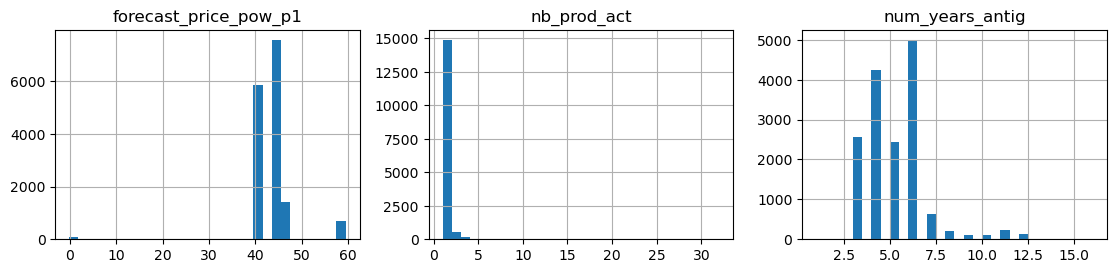

In [363]:
# Select only numerical columns
numerical_features = ['forecast_price_pow_p1', 'nb_prod_act', 'num_years_antig']

# Plot histograms
cust[numerical_features].hist(bins=30, figsize=(15, 15), layout=(6, 4))
plt.tight_layout()
plt.show()


In [364]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15674 entries, 0 to 16095
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        15674 non-null  object        
 1   activity_new              15674 non-null  object        
 2   channel_sales             15674 non-null  object        
 3   cons_12m                  15674 non-null  int64         
 4   cons_gas_12m              15674 non-null  int64         
 5   cons_last_month           15674 non-null  int64         
 6   date_activ                15674 non-null  datetime64[ns]
 7   date_end                  15674 non-null  datetime64[ns]
 8   date_modif_prod           15674 non-null  datetime64[ns]
 9   date_renewal              15674 non-null  datetime64[ns]
 10  forecast_cons_12m         15674 non-null  float64       
 11  forecast_cons_year        15674 non-null  int64         
 12  forecast_discount_energ

### b. Countplot

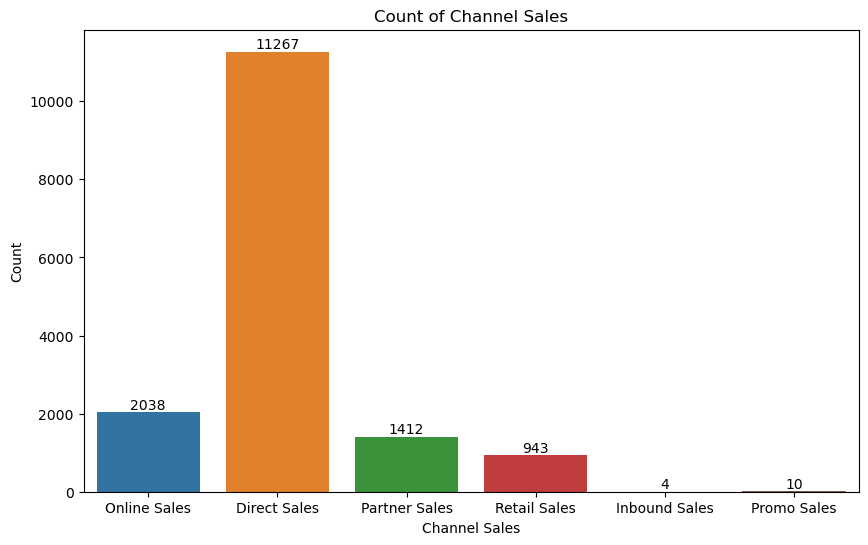

In [365]:
plt.figure(figsize = (10, 6))
sns.countplot(data = cust, x = 'channel_sales')
plt.title('Count of Channel Sales')
plt.xlabel('Channel Sales')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

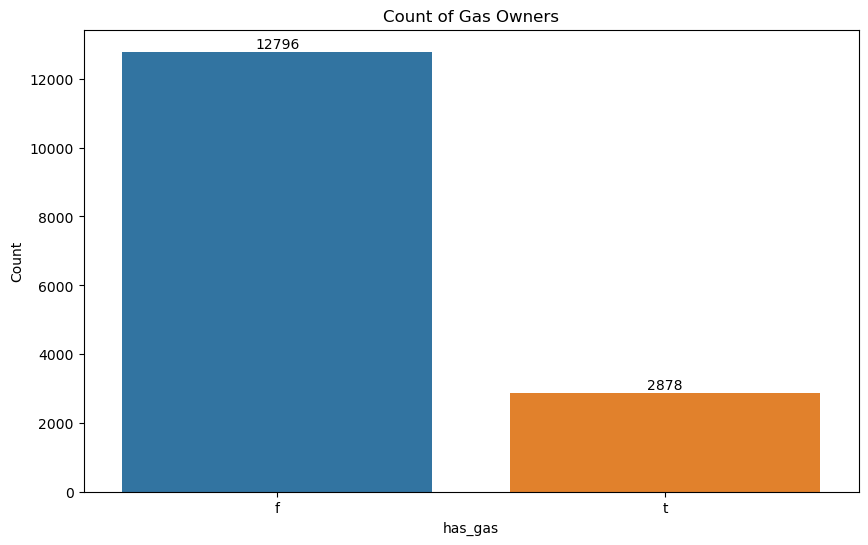

In [366]:
plt.figure(figsize = (10, 6))
sns.countplot(data = cust, x ='has_gas')
plt.title('Count of Gas Owners')
plt.xlabel('has_gas')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

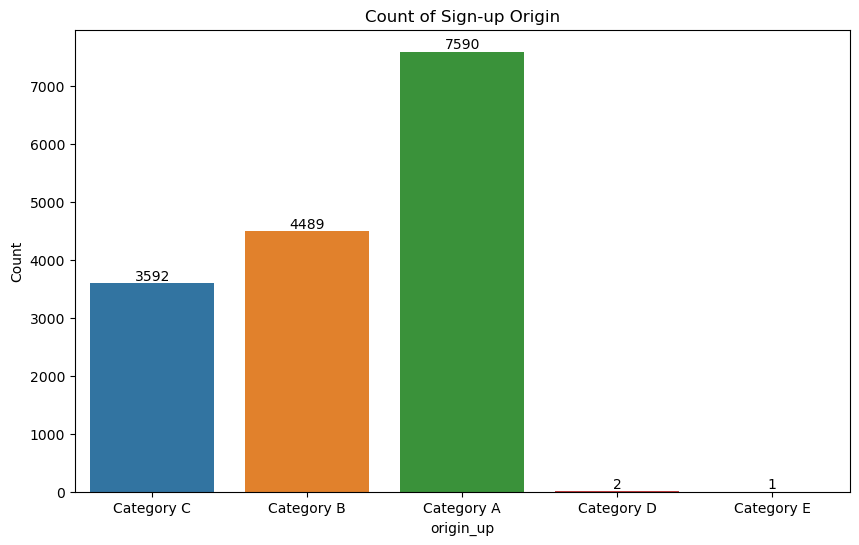

In [367]:
plt.figure(figsize = (10, 6))
sns.countplot(data = cust, x ='origin_up')
plt.title('Count of Sign-up Origin')
plt.xlabel('origin_up')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

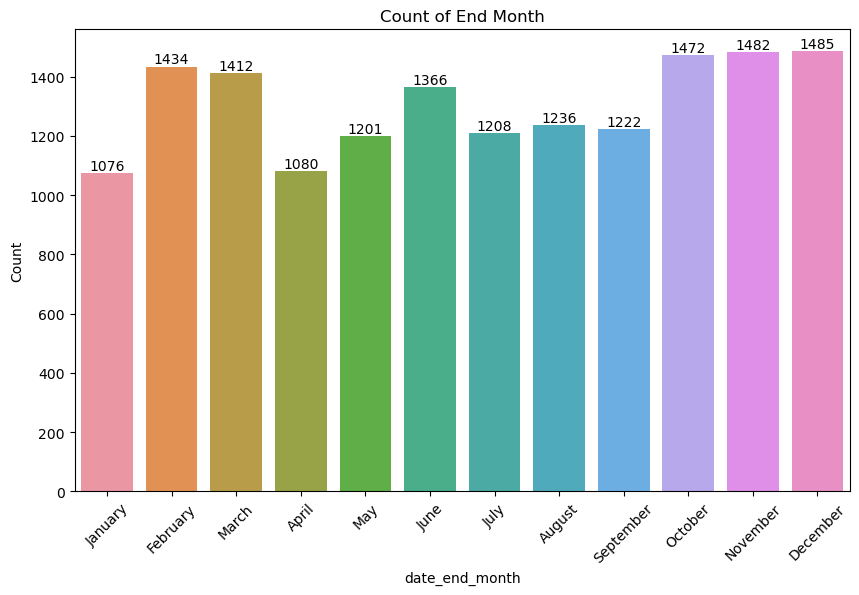

In [368]:
months_ordered = calendar.month_name[1:13]  # Get month names from January to December

plt.figure(figsize=(10, 6))
sns.countplot(data=cust, x='date_end_month', order=months_ordered)
plt.title('Count of End Month')
plt.xlabel('date_end_month')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()


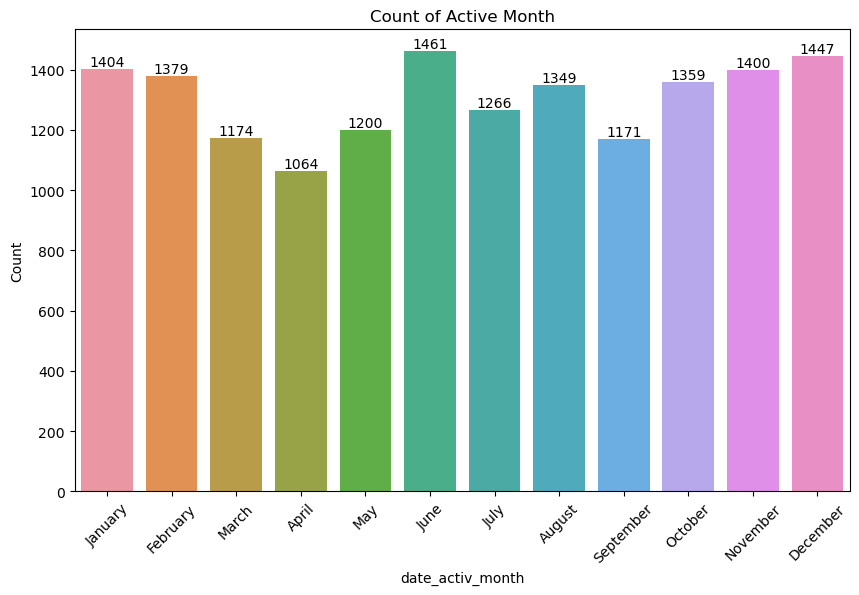

In [369]:
ordered_months = calendar.month_name[1:13]  # Get month names from January to December

plt.figure(figsize=(10, 6))
sns.countplot(data=cust, x='date_activ_month', order=ordered_months)
plt.title('Count of Active Month')
plt.xlabel('date_activ_month')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()


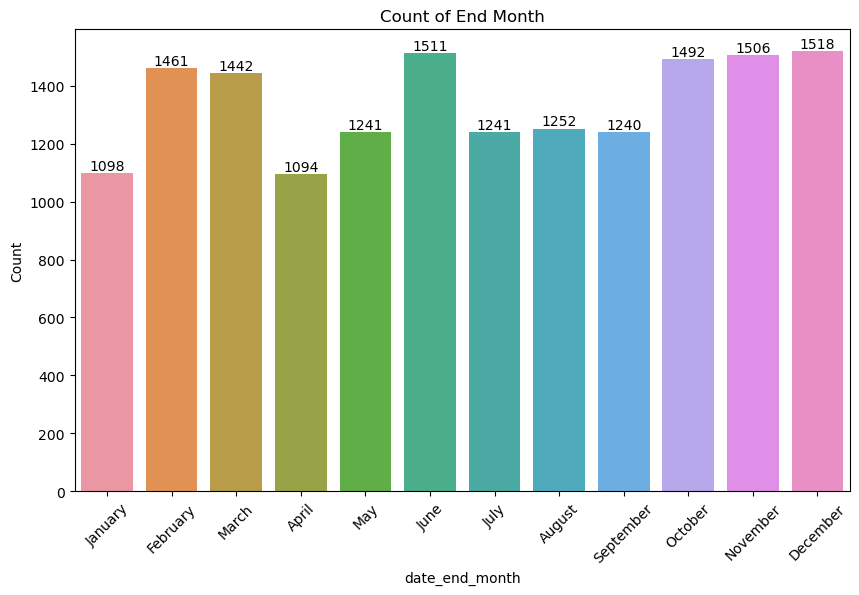

In [230]:
months_ordered = calendar.month_name[1:13]  # Get month names from January to December

plt.figure(figsize=(10, 6))
sns.countplot(data=cust, x='date_end_month', order=months_ordered)
plt.title('Count of End Month')
plt.xlabel('date_end_month')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()


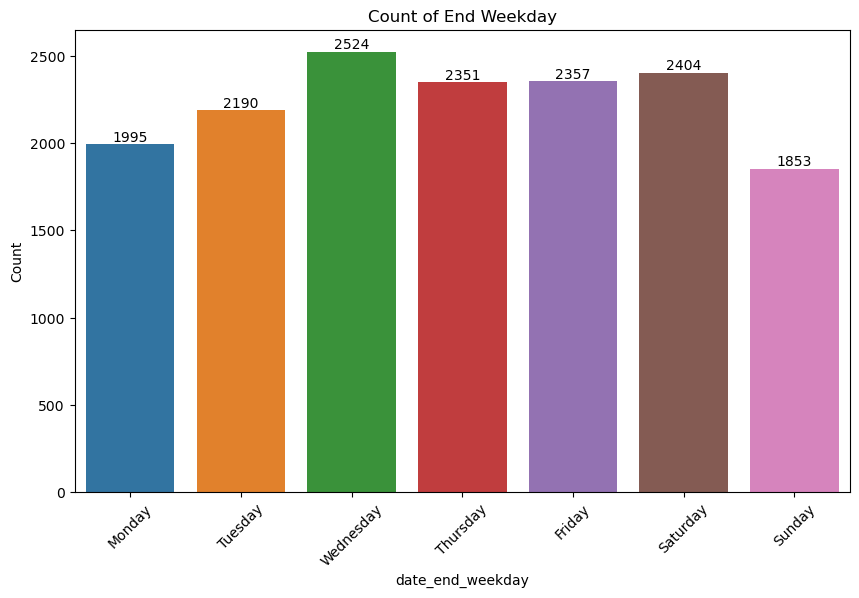

In [370]:
# Get weekday names starting from Monday to Sunday
weekday_ordered = list(calendar.day_name)  # ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.countplot(data=cust, x='date_end_weekday', order=weekday_ordered)
plt.title('Count of End Weekday')
plt.xlabel('date_end_weekday')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

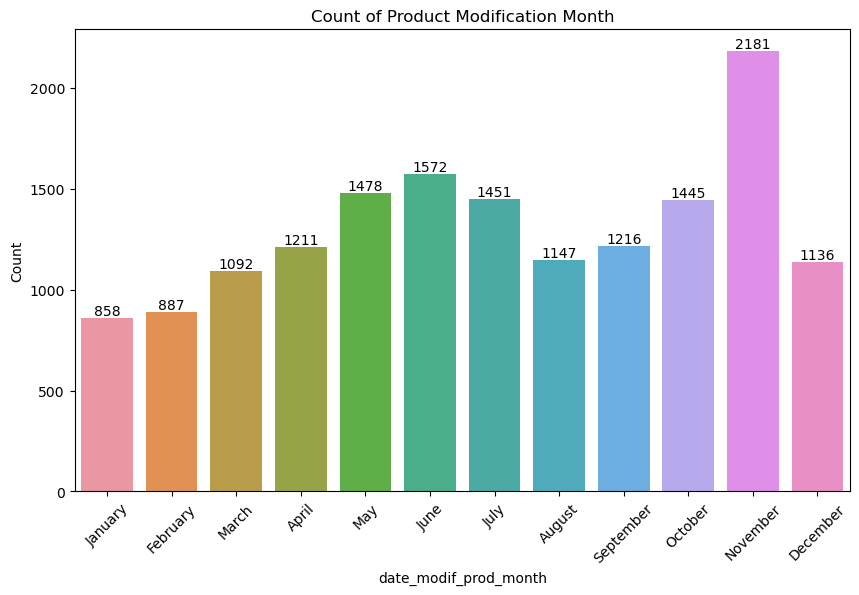

In [371]:
months_ordered = calendar.month_name[1:13]  # Get month names from January to December

plt.figure(figsize=(10, 6))
sns.countplot(data=cust, x='date_modif_prod_month', order=months_ordered)
plt.title('Count of Product Modification Month')
plt.xlabel('date_modif_prod_month')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()


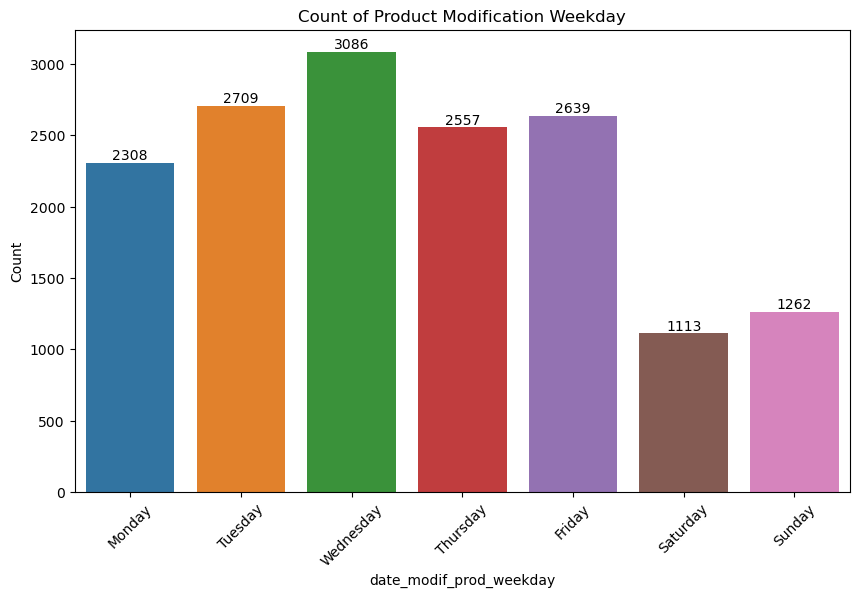

In [372]:
# Get weekday names starting from Monday to Sunday
weekday_ordered = list(calendar.day_name)  # ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.countplot(data=cust, x='date_modif_prod_weekday', order=weekday_ordered)
plt.title('Count of Product Modification Weekday')
plt.xlabel('date_modif_prod_weekday')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

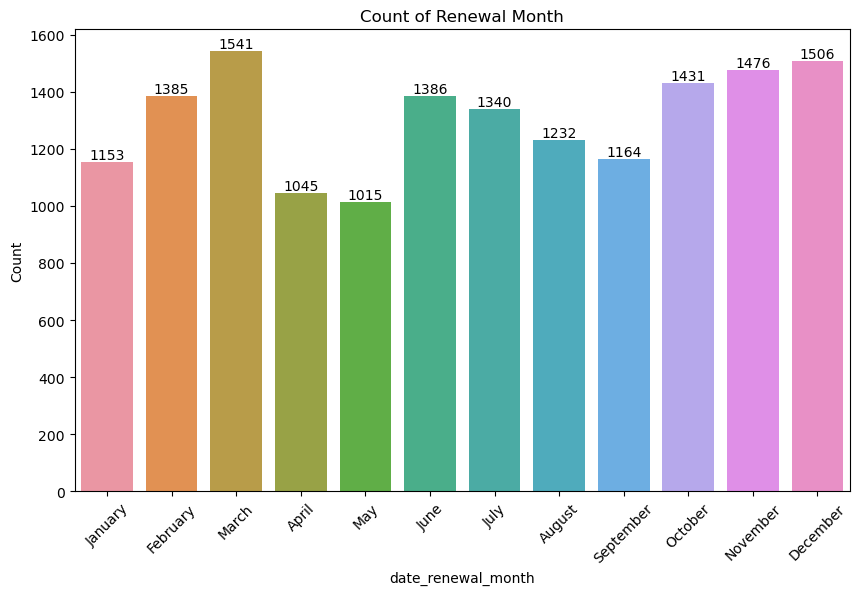

In [373]:
months_ordered = calendar.month_name[1:13]  # Get month names from January to December

plt.figure(figsize=(10, 6))
sns.countplot(data=cust, x='date_renewal_month', order=months_ordered)
plt.title('Count of Renewal Month')
plt.xlabel('date_renewal_month')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()


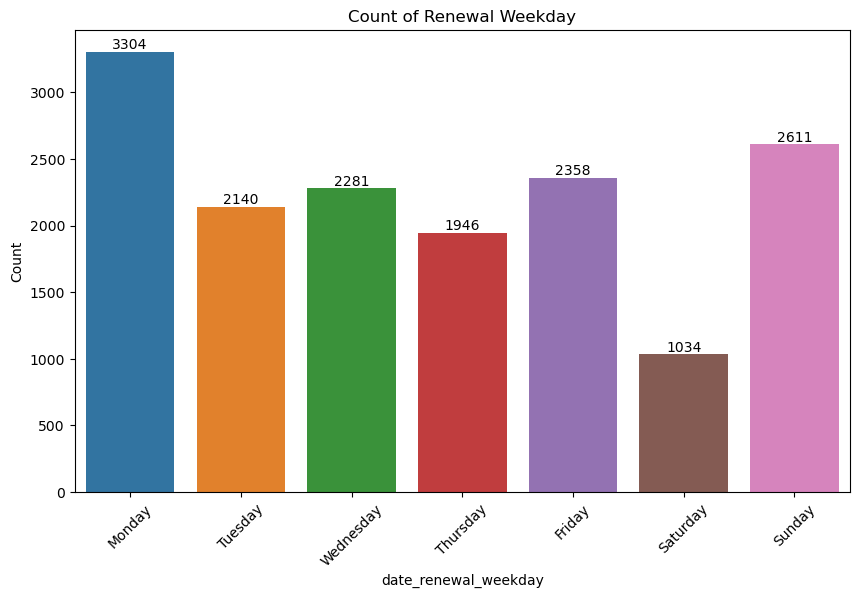

In [374]:
# Get weekday names starting from Monday to Sunday
weekday_ordered = list(calendar.day_name)  # ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.countplot(data=cust, x='date_renewal_weekday', order=weekday_ordered)
plt.title('Count of Renewal Weekday')
plt.xlabel('date_renewal_weekday')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

### c. Correlation Matrix

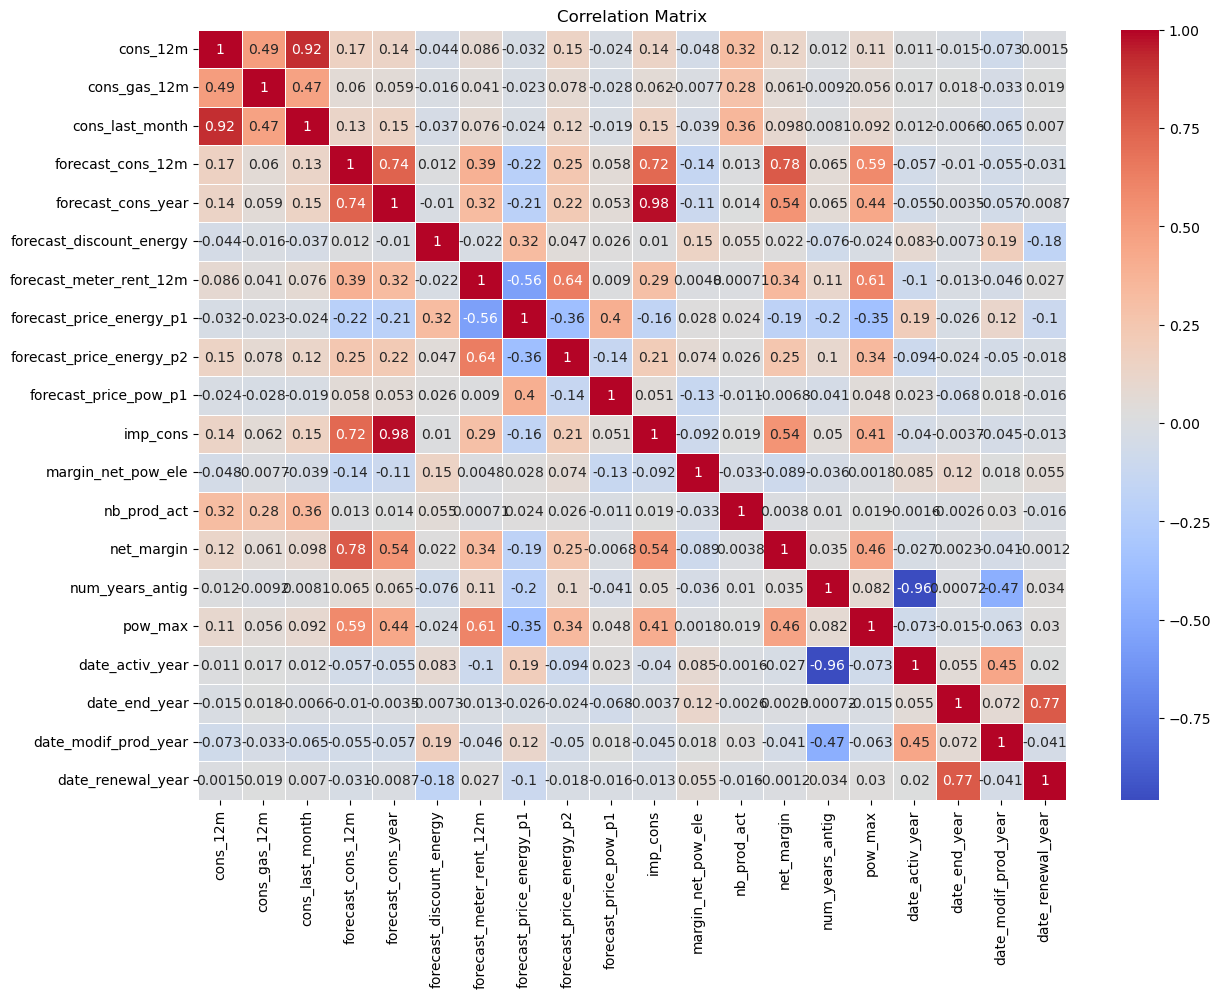

In [375]:
# Exclude non-numeric columns from correlation matrix
numeric_cols = cust.select_dtypes(include=['int', 'float']).columns
corr_matrix = cust[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

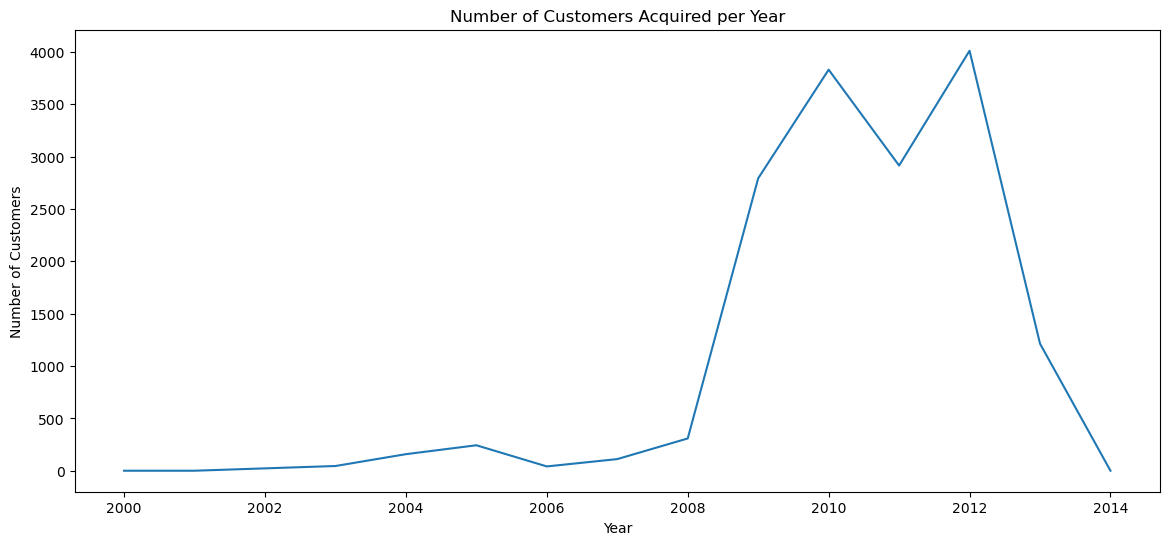

In [376]:
plt.figure(figsize=(14, 6))
cust.groupby('date_activ_year').size().plot(kind='line')
plt.title('Number of Customers Acquired per Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()


In [379]:
cust ['date_end_year'].head()

0    2016
2    2016
3    2016
4    2016
5    2016
Name: date_end_year, dtype: int32

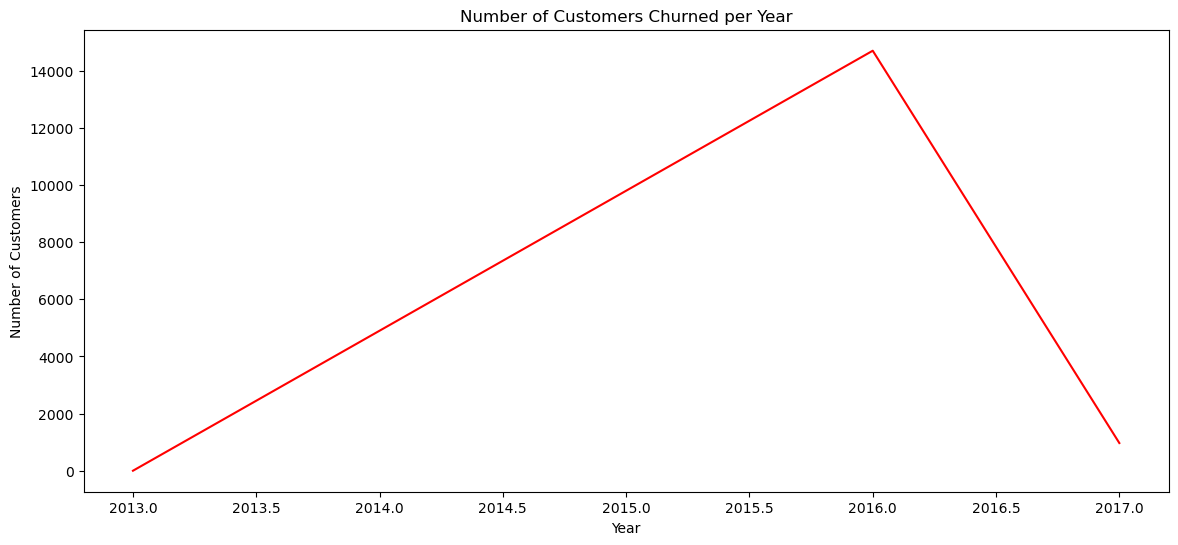

In [380]:
plt.figure(figsize=(14, 6))
cust.groupby('date_end_year').size().plot(kind='line', color='red')
plt.title('Number of Customers Churned per Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()

### e. Box Plot - Outlier Detection

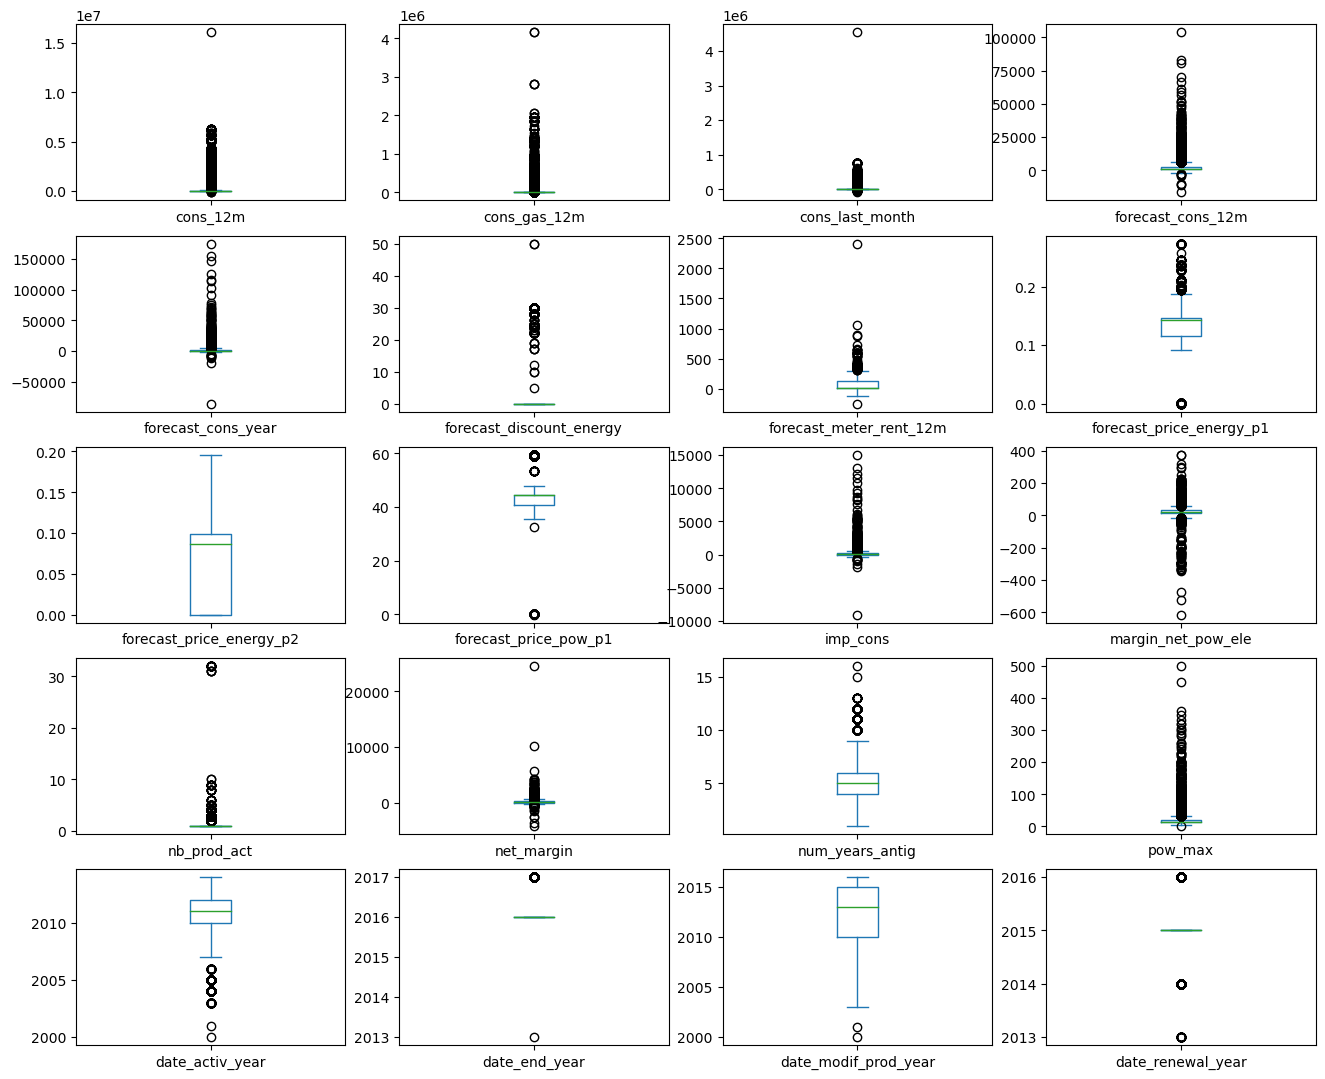

In [382]:
# box (subplots) helps to identify outliers
cust.plot(kind='box', subplots=True, layout=(6,4), sharex=False, sharey=False, figsize=(16,16))
plt.show()

## 2. hist

In [240]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             193002 non-null  object        
 1   price_date     193002 non-null  datetime64[ns]
 2   price_p1_var   193002 non-null  float64       
 3   price_p2_var   193002 non-null  float64       
 4   price_p3_var   193002 non-null  float64       
 5   price_p1_fix   193002 non-null  float64       
 6   price_p2_fix   193002 non-null  float64       
 7   price_p3_fix   193002 non-null  float64       
 8   avg_price_var  193002 non-null  float64       
 9   month          193002 non-null  object        
 10  year           193002 non-null  int32         
dtypes: datetime64[ns](1), float64(7), int32(1), object(2)
memory usage: 15.5+ MB


### a. Histogram

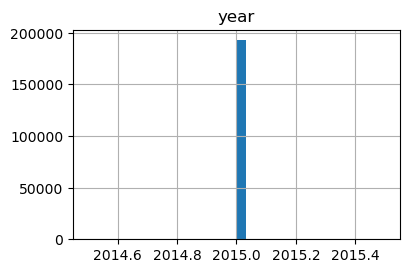

In [383]:
# Select only numerical columns
numerical_features = ['year']

# Plot histograms
hist[numerical_features].hist(bins=30, figsize=(15, 15), layout=(6, 4))
plt.tight_layout()
plt.show()


### b. Countplot

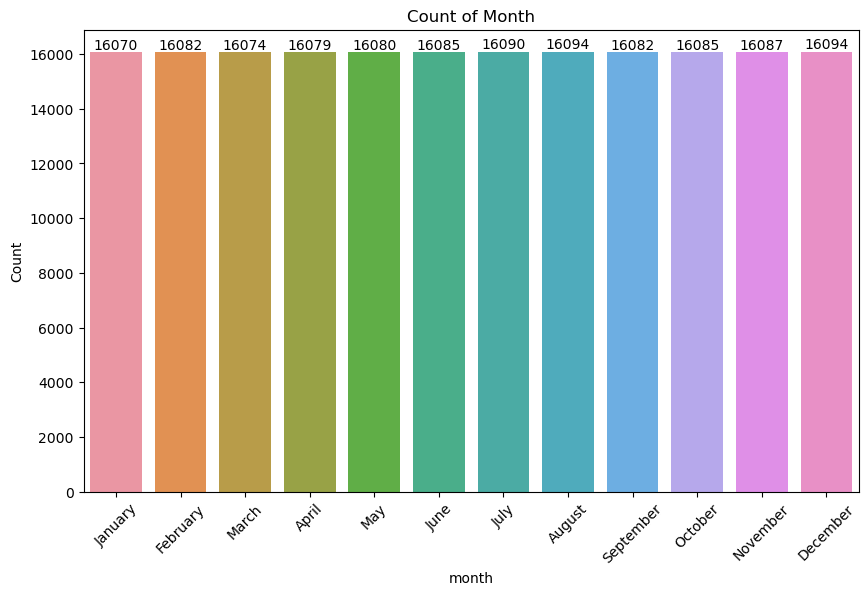

In [384]:
months_ordered = calendar.month_name[1:13]  # Get month names from January to December

plt.figure(figsize=(10, 6))
sns.countplot(data=hist, x='month', order=months_ordered)
plt.title('Count of Month')
plt.xlabel('month')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()


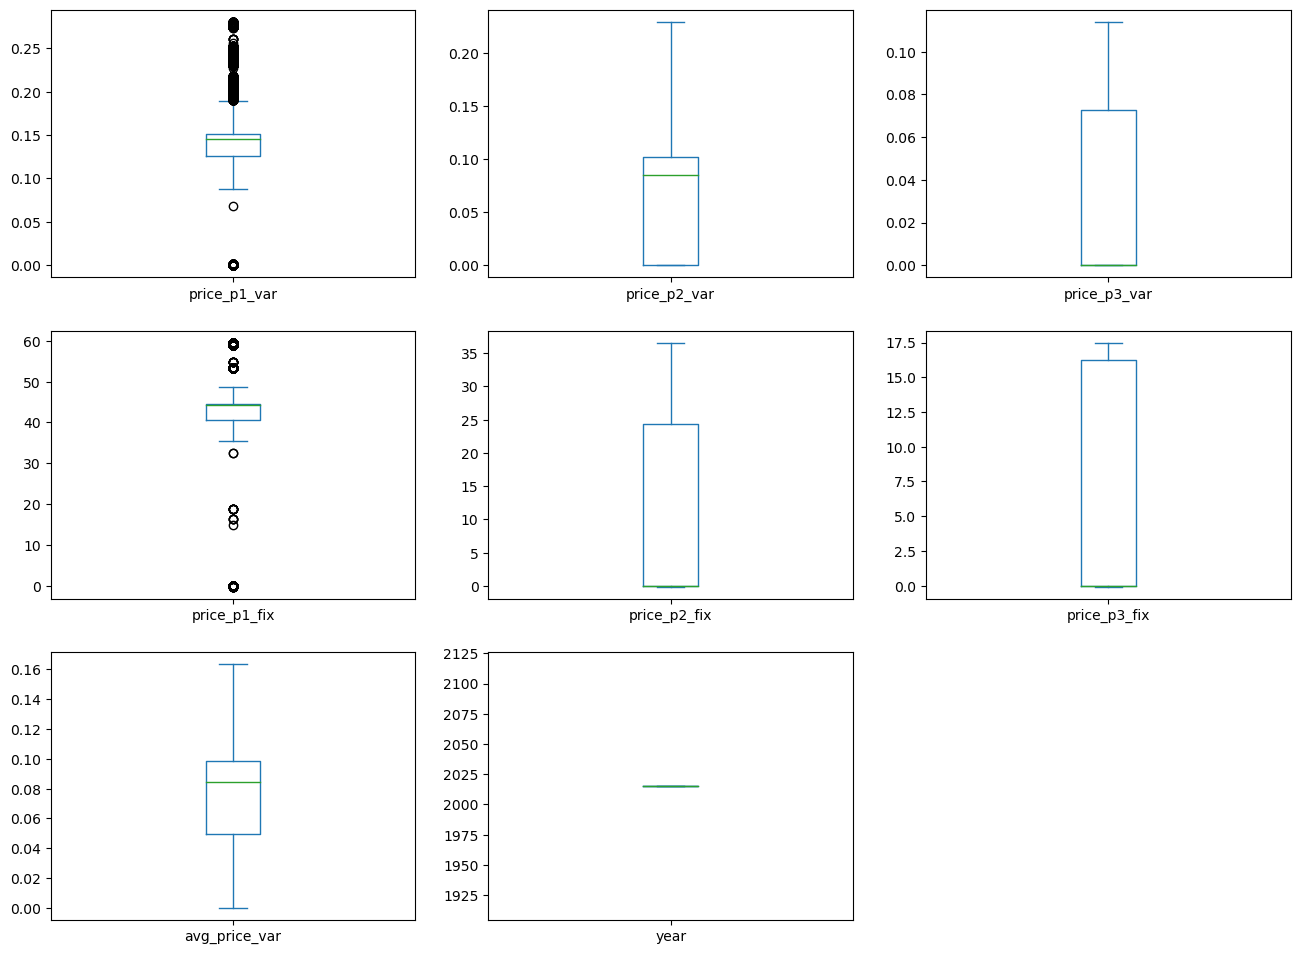

In [385]:
# box (subplots) helps to identify outliers
hist.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(16,16))
plt.show()

In [386]:
hist['price_p1_fix'].min()

-0.1777788

## 3. Churn

In [387]:
churn['churn'].value_counts()

churn
0    14501
1     1595
Name: count, dtype: int64

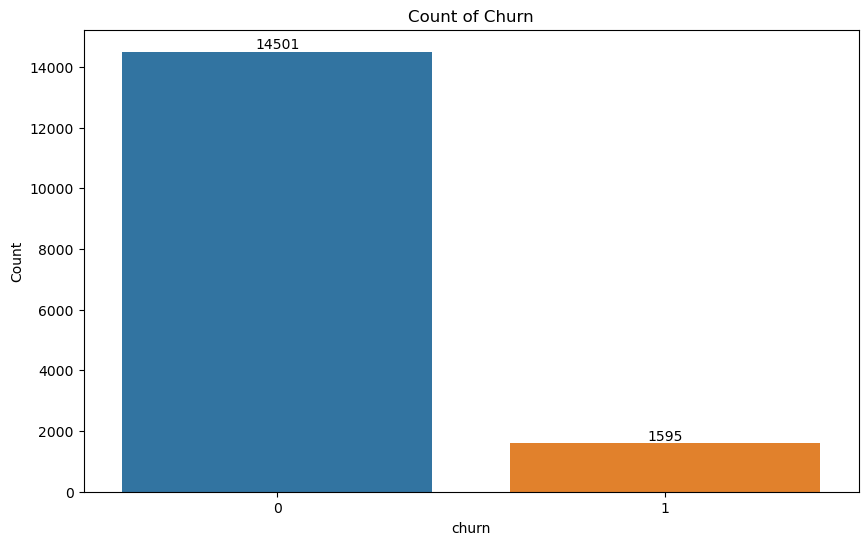

In [388]:
plt.figure(figsize = (10, 6))
sns.countplot(data = churn, x ='churn')
plt.title('Count of Churn')
plt.xlabel('churn')
plt.ylabel('Count')

# Adding count labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

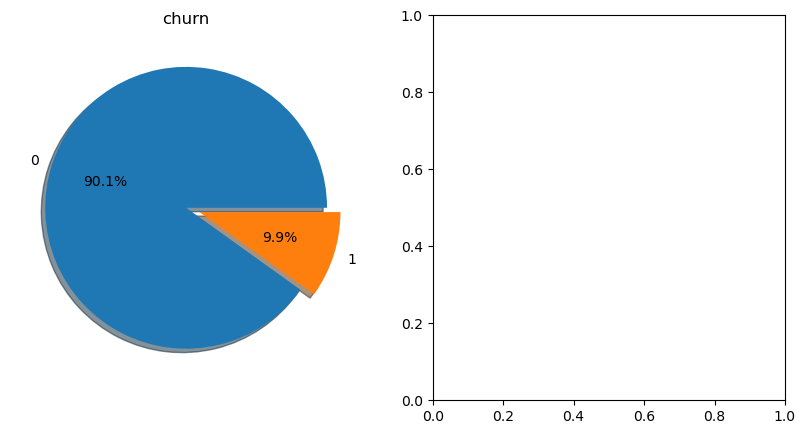

In [389]:
# Outcome count plot
f,ax = plt.subplots(1,2,figsize = (10,5))
churn['churn'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('churn')
ax[0].set_ylabel('')
#sns.countplot('churn', data = churn, ax = ax[1])
#ax[1].set_title('churn')
#N, P = churn['churn'].value_counts()
#print('Negative (0): ', 0)
#print('Positive (1): ', 1)
#plt.grid()
plt.show()

## Tables Merging 

In [390]:
# Ensure 'id' columns are the same data type
cust['id'] = cust['id'].astype(str)
churn['id'] = churn['id'].astype(str)
hist['id'] = hist['id'].astype(str)

In [391]:
# List of tables to be merged
tables = [cust, hist, churn]

In [392]:
# Merging all tables on 'customer_id' using inner join 
merged_tables = reduce(lambda left, right: pd.merge(left, right, on = 'id', how = 'inner'), tables)

In [393]:
merged_tables.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,avg_price_var,month,year,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,Online Sales,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0.088965,January,2015,0
1,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,Online Sales,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0.088965,February,2015,0
2,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,Online Sales,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0.088965,March,2015,0
3,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,Online Sales,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0.088965,April,2015,0
4,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,Online Sales,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0.088965,May,2015,0


In [394]:
merged_tables.shape

(187954, 48)

In [395]:
merged_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187954 entries, 0 to 187953
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        187954 non-null  object        
 1   activity_new              187954 non-null  object        
 2   channel_sales             187954 non-null  object        
 3   cons_12m                  187954 non-null  int64         
 4   cons_gas_12m              187954 non-null  int64         
 5   cons_last_month           187954 non-null  int64         
 6   date_activ                187954 non-null  datetime64[ns]
 7   date_end                  187954 non-null  datetime64[ns]
 8   date_modif_prod           187954 non-null  datetime64[ns]
 9   date_renewal              187954 non-null  datetime64[ns]
 10  forecast_cons_12m         187954 non-null  float64       
 11  forecast_cons_year        187954 non-null  int64         
 12  fo

In [396]:
merged_tables.columns

Index(['id', 'activity_new', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_p1', 'forecast_price_energy_p2',
       'forecast_price_pow_p1', 'has_gas', 'imp_cons', 'margin_net_pow_ele',
       'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'date_activ_year', 'date_activ_month', 'date_activ_weekday',
       'date_end_year', 'date_end_month', 'date_end_weekday',
       'date_modif_prod_year', 'date_modif_prod_month',
       'date_modif_prod_weekday', 'date_renewal_year', 'date_renewal_month',
       'date_renewal_weekday', 'price_date', 'price_p1_var', 'price_p2_var',
       'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix',
       'avg_price_var', 'month', 'year', 'churn'],
      dtype='object')

In [397]:
merged_tables.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,avg_price_var,year,churn
count,1.879540e+05,1.879540e+05,1.879540e+05,187954,187954,187954,187954,187954.000000,187954.00000,187954.000000,...,187954,187954.000000,187954.000000,187954.000000,187954.000000,187954.000000,187954.000000,187954.000000,187954.0,187954.000000
mean,1.916210e+05,3.131506e+04,1.930510e+04,2011-01-08 01:41:47.400747008,2016-07-28 01:29:11.215723008,2012-12-09 04:14:16.550006784,2015-07-21 05:01:26.382838528,2350.038525,1888.81181,0.976484,...,2015-06-16 12:41:43.914787840,0.141009,0.054356,0.030686,43.315551,10.679486,6.455301,0.075350,2015.0,0.096907
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,2000-07-25 00:00:00,2013-05-06 00:00:00,2000-07-25 00:00:00,2013-06-26 00:00:00,-16689.260000,-85627.00000,0.000000,...,2015-01-01 00:00:00,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172,0.000000,2015.0,0.000000
25%,5.883000e+03,0.000000e+00,0.000000e+00,2010-01-11 00:00:00,2016-04-27 00:00:00,2010-08-04 00:00:00,2015-04-17 00:00:00,512.200000,0.00000,0.000000,...,2015-04-01 00:00:00,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000,0.049852,2015.0,0.000000
50%,1.520100e+04,0.000000e+00,8.960000e+02,2011-02-18 00:00:00,2016-08-01 00:00:00,2013-04-20 00:00:00,2015-07-27 00:00:00,1175.910000,376.00000,0.000000,...,2015-07-01 00:00:00,0.145937,0.085100,0.000000,44.266930,0.000000,0.000000,0.084289,2015.0,0.000000
75%,4.948550e+04,0.000000e+00,4.096000e+03,2012-04-17 00:00:00,2016-11-01 00:00:00,2015-05-24 00:00:00,2015-10-30 00:00:00,2673.040000,1990.00000,0.000000,...,2015-10-01 00:00:00,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389,0.098433,2015.0,0.000000
max,1.609711e+07,4.154590e+06,4.538720e+06,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,103801.930000,175375.00000,50.000000,...,2015-12-01 00:00:00,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221,0.163193,2015.0,1.000000
std,6.726176e+05,1.716102e+05,8.231749e+04,NaN,NaN,NaN,NaN,3985.904452,5234.51844,5.124940,...,NaN,0.024954,0.049874,0.036209,5.387979,12.798027,7.759819,0.024743,0.0,0.295831


In [398]:
merged_tables_copy = merged_tables.copy()

In [399]:
merged_tables.drop(columns = ['id'], inplace = True)

In [400]:
merged_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187954 entries, 0 to 187953
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   activity_new              187954 non-null  object        
 1   channel_sales             187954 non-null  object        
 2   cons_12m                  187954 non-null  int64         
 3   cons_gas_12m              187954 non-null  int64         
 4   cons_last_month           187954 non-null  int64         
 5   date_activ                187954 non-null  datetime64[ns]
 6   date_end                  187954 non-null  datetime64[ns]
 7   date_modif_prod           187954 non-null  datetime64[ns]
 8   date_renewal              187954 non-null  datetime64[ns]
 9   forecast_cons_12m         187954 non-null  float64       
 10  forecast_cons_year        187954 non-null  int64         
 11  forecast_discount_energy  187954 non-null  float64       
 12  fo

## Encoding

In [401]:
# Split the New Dataset
X = merged_tables.drop(columns = ['churn']) 

y = merged_tables['churn']

In [402]:
# Encode ordinal features
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_mapping = {month: i for i, month in enumerate(month_order)}
weekday_mapping = {day: i for i, day in enumerate(weekday_order)}

X['date_activ_month'] = X['date_activ_month'].map(month_mapping)
X['date_activ_weekday'] = X['date_activ_weekday'].map(weekday_mapping)
X['date_end_month'] = X['date_end_month'].map(month_mapping)
X['date_end_weekday'] = X['date_end_weekday'].map(weekday_mapping)
X['date_modif_prod_month'] = X['date_modif_prod_month'].map(month_mapping)
X['date_modif_prod_weekday'] = X['date_modif_prod_weekday'].map(weekday_mapping)
X['date_renewal_month'] = X['date_renewal_month'].map(month_mapping)
X['date_renewal_weekday'] = X['date_renewal_weekday'].map(weekday_mapping)

ordinal_cols = ['date_activ_month', 'date_activ_weekday', 'date_end_month', 'date_end_weekday',
                'date_modif_prod_month', 'date_modif_prod_weekday', 'date_renewal_month', 'date_renewal_weekday']
nominal_cols = ['channel_sales', 'origin_up', 'has_gas']  # Add other nominal columns here
numerical_cols = X.select_dtypes(include=['number']).columns.difference(ordinal_cols)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('nom', nominal_transformer, nominal_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Apply mutual information for initial filtering
selector = SelectKBest(mutual_info_classif, k=20)  # Select top 20 features based on mutual information
X_selected = selector.fit_transform(X_preprocessed, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply Lasso for feature selection
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)
model = SelectFromModel(lasso, prefit=True)
X_train_lasso = model.transform(X_train)
X_test_lasso = model.transform(X_test)

# Use a tree-based model to validate and enhance feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_lasso, y_train)
importances = rf.feature_importances_

# Select features based on importance
threshold = np.mean(importances)
model_rf = SelectFromModel(rf, threshold=threshold, prefit=True)
X_train_rf = model_rf.transform(X_train_lasso)
X_test_rf = model_rf.transform(X_test_lasso)

In [403]:
# Get feature names after mutual information selection
mutual_info_features = selector.get_support(indices=True)

# Get feature names after Lasso selection
lasso_features = np.where(model.get_support())[0]

# Get final selected features from Random Forest
final_features_indices = np.where(model_rf.get_support())[0]

# Print the selected feature names
selected_features = preprocessor.get_feature_names_out()
final_selected_features = selected_features[mutual_info_features][lasso_features][final_features_indices]

print("Selected Features:", final_selected_features)

Selected Features: ['num__cons_12m' 'num__cons_last_month' 'num__forecast_cons_12m'
 'num__forecast_cons_year' 'num__forecast_meter_rent_12m'
 'num__forecast_price_energy_p1' 'num__imp_cons' 'num__margin_net_pow_ele'
 'num__net_margin' 'num__pow_max']


In [404]:
mutual_info_features

array([ 0,  1,  2,  3,  8,  9, 11, 12, 13, 15, 16, 18, 20, 22, 24, 26, 28,
       34, 35, 39], dtype=int64)

In [405]:
lasso_features

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19], dtype=int64)

In [406]:
final_features_indices

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [407]:
# All features
rf_all_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_all_features.fit(X_train, y_train)
y_pred_all_features = rf_all_features.predict(X_test)
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)
print(f"Model Accuracy with All Features: {accuracy_all_features:.3f}")

# Selected features
rf_selected_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected_features.fit(X_train_rf, y_train)
y_pred_selected_features = rf_selected_features.predict(X_test_rf)
accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)
print(f"Model Accuracy with Selected Features: {accuracy_selected_features:.3f}")


Model Accuracy with All Features: 1.000
Model Accuracy with Selected Features: 1.000


## Modeling

### 1. Logistic Regression

In [409]:
# Train a final model with selected features
lr = LogisticRegression(random_state=42)
lr.fit(X_train_rf, y_train)
lr_pred = lr.predict(X_test_rf)

# Evaluate the model
accuracy = accuracy_score(y_test, lr_pred)
print(f"Model Accuracy: {accuracy:.3f}")

Model Accuracy: 0.904


In [410]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.9028351389637078

In [411]:
confusion_matrix(y_test, lr_pred)

array([[33962,    12],
       [ 3614,     3]], dtype=int64)

In [412]:
print('Classification Report of Logistic Regression: \n', classification_report(y_test, lr_pred, digits = 3))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0      0.904     1.000     0.949     33974
           1      0.200     0.001     0.002      3617

    accuracy                          0.904     37591
   macro avg      0.552     0.500     0.475     37591
weighted avg      0.836     0.904     0.858     37591



## 2. K-Nearest Neighbors(KNN)

In [413]:
knn = KNeighborsClassifier()
knn.fit(X_train_rf, y_train)
knn_pred = knn.predict(X_test_rf)

# Evaluate the model
accuracy = accuracy_score(y_test, knn_pred)
print(f"Model Accuracy: {accuracy:.3f}")

Model Accuracy: 1.000


In [414]:
confusion_matrix(y_test, knn_pred)

array([[33974,     0],
       [    0,  3617]], dtype=int64)

In [415]:
print('Classification Report of KNN: \n', classification_report(y_test, knn_pred, digits = 3))

Classification Report of KNN: 
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     33974
           1      1.000     1.000     1.000      3617

    accuracy                          1.000     37591
   macro avg      1.000     1.000     1.000     37591
weighted avg      1.000     1.000     1.000     37591



## 2. Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_train_rf_scaled = scaler.fit_transform(X_train_rf)
X_test_rf_scaled = scaler.transform(X_test_rf)

# Reduce dimensions for faster SVM training
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_train_rf_pca = pca.fit_transform(X_train_rf_scaled)
X_test_rf_pca = pca.transform(X_test_rf_scaled)

# Build the SVM model with a linear kernel
svm = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm.fit(X_train_rf_pca, y_train)

# Make predictions on the test set
svm_pred = svm.predict(X_test_rf_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, svm_pred)
print(f"Model Accuracy: {accuracy:.3f}")


In [ ]:
svm = SVC(random_state=42)

# Train the SVM model
svm.fit(X_train_rf, y_train)

# Make predictions on the test set
svm_pred = svm.predict(X_test_rf)

# Evaluate the model
accuracy = accuracy_score(y_test, svm_pred)
print(f"Model Accuracy: {accuracy:.3f}")


In [188]:
confusion_matrix(y_test, svm_pred)

array([[34803,     0],
       [    0,  3798]], dtype=int64)

In [192]:
print('Classification Report of SVM: \n', classification_report(y_test, knn_pred, digits = 3))

Classification Report of KNN: 
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     34803
           1      1.000     1.000     1.000      3798

    accuracy                          1.000     38601
   macro avg      1.000     1.000     1.000     38601
weighted avg      1.000     1.000     1.000     38601

